# Part 4: Analysis on Word Frequency Over Time

In this analysis, we examine how the frequency of commonly used words changes over time in **State of the Union (SOTU) speeches**. Using SpaCy for linguistic preprocessing, each speech is tokenized, lemmatized, and filtered to remove stopwords, punctuation, and non-alphabetic tokens. We then compute yearly word counts and track the frequency of the top 10 most frequent content words across more than two centuries of presidential speeches.

The resulting time-series visualizations—along with 4-year rolling averages—highlight long-run shifts in presidential rhetoric, revealing how themes related to national identity, economic conditions, and global affairs rise and fall alongside major historical events and political priorities.

### Methods: Text Preprocessing and Frequency Analysis

All text analysis was conducted using SpaCy’s `en_core_web_sm` model. Each speech was processed using the following steps:

1. **Normalization:** Convert text to lowercase.
2. **Tokenization:** Split text into lexical tokens using SpaCy's tokenizer.
3. **Lemmatization:** Replace each token with its lemma (base form) to unify variants such as *working* → *work*.
4. **Filtering:**  
   - Remove punctuation and non-alphabetic tokens  
   - Remove SpaCy stopwords  
5. **Aggregation:**  
   - For each year, merge all tokens from speeches delivered that year  
   - Compute word counts using `collections.Counter`  
6. **Visualization:**  
   - Construct a word–year frequency dataframe  
   - Plot yearly frequencies  
   - Add a 4-year centered rolling average to smooth variability

These steps ensure consistent and reproducible text preprocessing across all historical documents, allowing for meaningful comparisons of word usage patterns over time.

### 1. Setup: Read Data

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import spacy
from collections import Counter

plt.style.use('seaborn-v0_8-dark')

In [2]:
!{sys.executable} -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.7 MB/s  0:00:00m0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
sou = pd.read_csv("data/SOTU.csv")
sou['Year'] = sou['Year'].astype(int)
nlp = spacy.load("en_core_web_sm")

### 2. Preprocess text and count words per year

In [4]:
# Lowercase, remove stopwords/punctuation
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc 
              if not token.is_stop and not token.is_punct and token.is_alpha]
    return tokens

# Apply tokenization to each speech
sou['Tokens'] = sou['Text'].apply(tokenize_text)

### 3. Aggregate word counts by year

In [5]:
# Group by Year
years = sorted(sou['Year'].dropna().unique())
word_counts_by_year = {}

for year in years:
    texts = sou[sou['Year'] == year]['Tokens']
    all_tokens = [token for tokens in texts for token in tokens]
    word_counts_by_year[year] = Counter(all_tokens)

### 4. Analyze frequency of selected words over time

In [6]:
words_to_track = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

# Build a dataframe
freq_df = pd.DataFrame(index=years, columns=words_to_track)

for year in years:
    for word in words_to_track:
        freq_df.loc[year, word] = word_counts_by_year[year].get(word, 0)

freq_df = freq_df.astype(int)
freq_df.head()

,year,america,people,american,work,new,job,country,americans,world
1790,0,0,12,0,4,4,0,16,0,0
1791,4,0,4,0,0,8,0,6,0,0
1792,6,0,0,0,0,4,0,2,0,0
1793,3,0,2,0,0,2,0,2,0,1
1794,1,0,2,2,1,2,0,2,0,1


### 5. Plot word frequencies over time

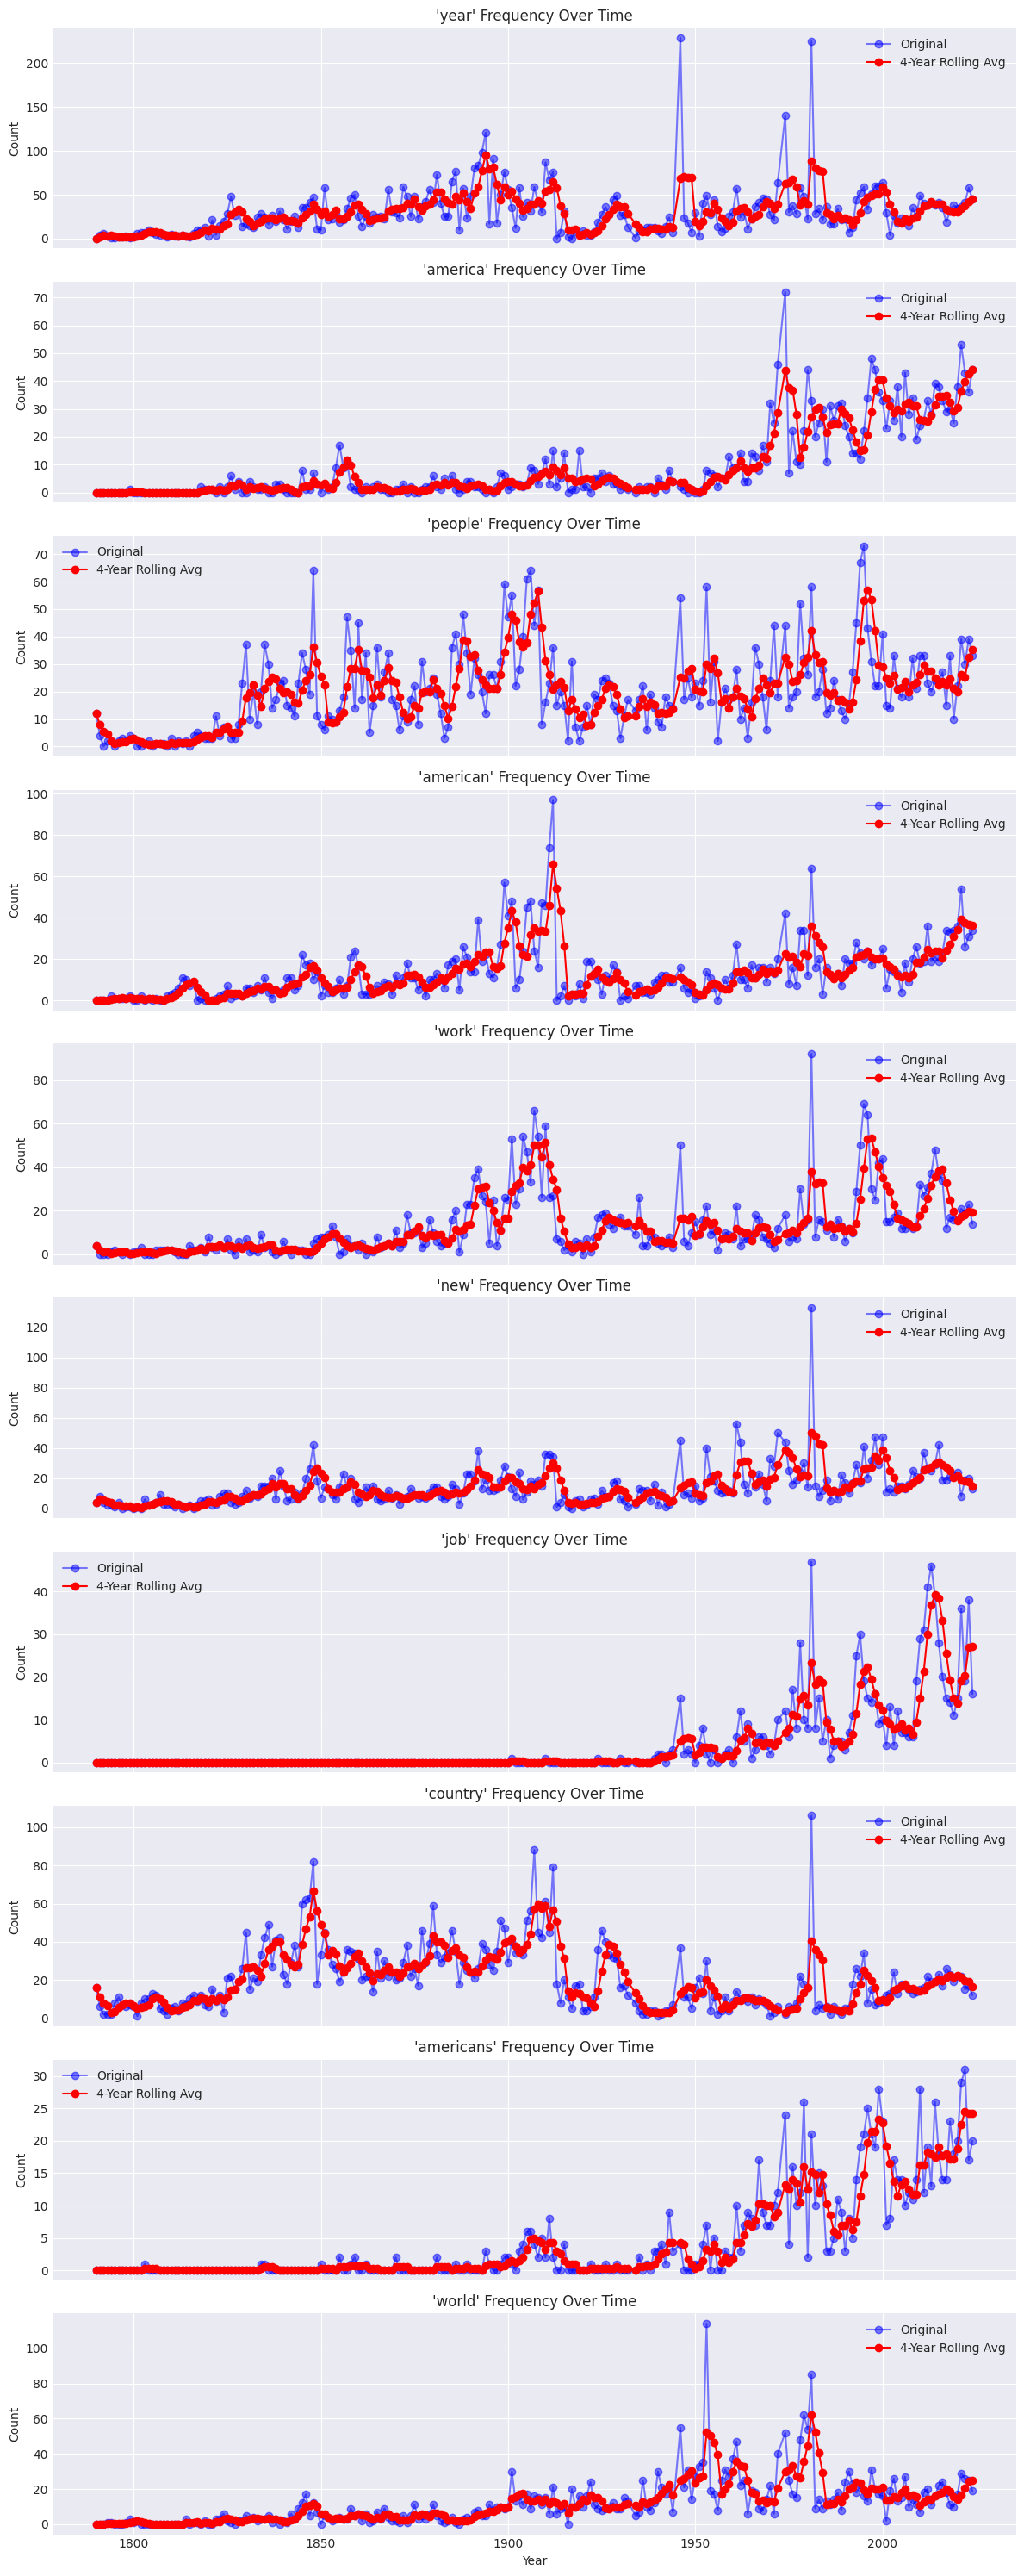

In [7]:
# Create subplots (one row per word)
fig, axes = plt.subplots(len(words_to_track), 1, figsize=(12, 3*len(words_to_track)), sharex=True)

# Rolling window size (in years)
window_size = 4

for i, word in enumerate(words_to_track):
    # Original counts
    axes[i].plot(freq_df.index, freq_df[word], marker='o', alpha=0.5, label='Original', color='b')
    
    # Rolling average
    rolling_series = freq_df[word].rolling(window=window_size, min_periods=1).mean()
    axes[i].plot(freq_df.index, rolling_series, marker='o', label=f'{window_size}-Year Rolling Avg', color='r')
    
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"'{word}' Frequency Over Time")
    axes[i].grid(True)
    axes[i].legend()

# X-axis label only on the bottom subplot
axes[-1].set_xlabel("Year")

plt.tight_layout()
plt.savefig("outputs/top_10_words_freq_over_time.png")
plt.show()

### Summary of Word Frequency Trends Over Time

To study how the thematic focus of U.S. Presidents has shifted across more than two centuries of State of the Union (SOTU) speeches, we analyzed the frequency of several commonly used political terms—such as year, america, people, american, work, new, job, country, americans, and world. Using SpaCy for lemmatization and stopword removal, word counts were aggregated by year and visualized with both raw frequencies and a 4-year rolling average to smooth short-term noise.

#### Key Observations

1. Long-run upward trend in many terms
Words like america, american, people, and country show a significant increase in usage beginning in the early 20th century. This reflects both longer speeches and a shift toward more populist, national identity–centered rhetoric.

2. Mid-20th-century spikes
Several terms show clear spikes during major historical periods:
    - war-adjacent words rise sharply during WWI, WWII, and the early Cold War.
    - world peaks especially around WWII and the globalist era following it.

3. Shifts in economic language
Words such as work, job, and economy grow noticeably starting in the 1930s, consistent with the Great Depression, New Deal, and the increasing focus on labor, employment, and fiscal policy in modern presidencies.

4. Modern rhetorical expansion
From the 1980s onward, terms relating to america, americans, and people stabilize at high frequencies, matching modern presidential communication styles that emphasize unity, national identity, and broad public appeal.

5. Rolling average helps uncover structure
The 4-year smoothing reveals persistent trends that are otherwise obscured by year-to-year variability, showing clearer long-run thematic cycles tied to political eras, wars, and economic conditions.

#### Interpretation

Overall, the evolution of word frequencies reveals how presidential priorities and communication strategies have changed over time—from early, formal constitutional reporting to modern speeches focused on national identity, global affairs, and the economy. The results show that simple frequency analysis, when combined with linguistic preprocessing and long-run smoothing, can meaningfully capture shifts in political discourse across centuries.

#### Detailed Summary on Each Word

1. “year”


Used mainly in phrases like “this year,” “last year,” or “in the coming year,” its frequency grows over time with speech length. Peaks often align with major transitions, crises, or agenda-setting years—periods when presidents emphasize timelines and legislative plans.

2. “america”

Steadily rises across the 20th and 21st centuries, reflecting an increasing emphasis on national framing. The spike during modern presidencies aligns with a more narrative-driven, patriotic speech style.

3. “people”


Grows sharply in the 20th century as presidents adopt more populist and direct communication styles. Used to emphasize democratic values, collective responsibility, and public sentiment.

4. “american”

Shows major rises during wartime and the Cold War, when appeals to national unity and identity became central. High modern usage reflects a continued emphasis on shared national identity.

5. “work”

Increases around the Great Depression and post-WWII era, mirroring shifts in economic policy focus, labor issues, and job creation as core political priorities.

6. “new”

Major spikes around the “New Deal” era of FDR (1930s) and the “New Frontier” era of JFK (1960s). Usage corresponds to reform-heavy periods when administrations introduce large policy agendas.

7. “job”

Barely present before the 20th century. Becomes prominent in the post-industrial economy, especially from the 1970s onward, reflecting the increasing political salience of employment and labor markets.

8. “country”

Used consistently but rises in modern speeches. Peaks often coincide with wars or national crises, as presidents emphasize unity, security, and collective purpose.

9. “americans”

Shows a clear modern upward trend. More conversational than “the American people," it signals increasingly direct public engagement and rhetorical personalization.

10. “world”

Spikes during major global conflicts—WWI, WWII, and early Cold War—reflecting America’s growing international role. Elevated usage continues in the post-war era due to foreign policy centrality.